# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [ ]:
import numpy as np

### Generate data

In [ ]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [ ]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [ ]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x = np.linspace(0,1,N)
    yd = []
    for i in x:
      yd.append(fx(i))
    yd = np.asarray(yd)
    return x, yd

In [ ]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

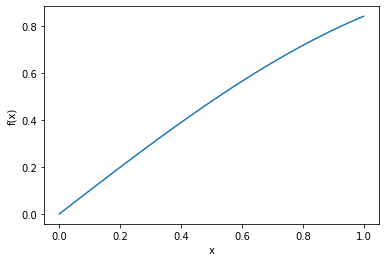

In [ ]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [ ]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    A = []
    for i in x:
      inner_list = []
      for j in range(D+1):
        inner_list.append(i**j)
      A.append(inner_list)
    A = np.asarray(A)
    return A

In [ ]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution and min-norm solution you learnt in the video

In [ ]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    A = np.asarray(A)
    yd = np.asarray(yd)
    if (A.shape[0]>A.shape[1]):
      # print("least square")
      w = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(yd))
    elif (A.shape[0]<A.shape[1]):
      # print("min norm")
      w = A.T.dot(np.linalg.inv(A.dot(A.T)).dot(yd))
    else:
      # print("exact")
      w = np.linalg.inv(A).dot(yd)
    return w

In [ ]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [ ]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    y = createA(x,w.shape[0]-1).dot(w)
    return y

In [ ]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [ ]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse = np.mean((yd-y)**2)
    return mse

In [ ]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [ ]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [ ]:
def trainModel(Ntrain, D):
  '''
  Inputs:
      Ntrain: number of train samples to be generated
      D: Degree of the model
  Outputs:
      x: np array of size (N,)
      y: np array of size (N,)
      yd: np array of size (N,)
      w: np array of size (D+1,)
      mse: scalar float
  '''
  x, yd = generateX_fx(Ntrain)
  A = createA(x, D)
  w = train_w(A, yd)
  y = predict_y(w, x)
  mse = compute_mse(y, yd)
  return x, y, yd, w, mse

In [ ]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x, yd = generateX_fx(Ntest)
    y = predict_y(w,x)
    mse = compute_mse(y, yd)
    return x, y, yd, mse

[ 1.01768936e-04  9.99174386e-01 -5.11264801e-03 -1.43112183e-01
 -3.35083008e-02  3.41796875e-02 -1.36718750e-02  4.88281250e-03
 -2.44140625e-03  4.88281250e-04 -6.10351562e-05]
MSE on train data =  2.6264113150621562e-08
MSE on test data =  2.3934964504050987e-08
Test passed 👍


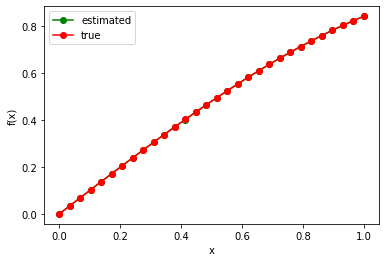

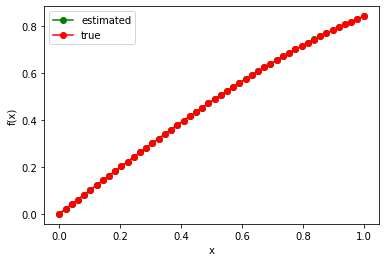

In [ ]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED(Optional)

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

Text(0.5, 0, 'N')

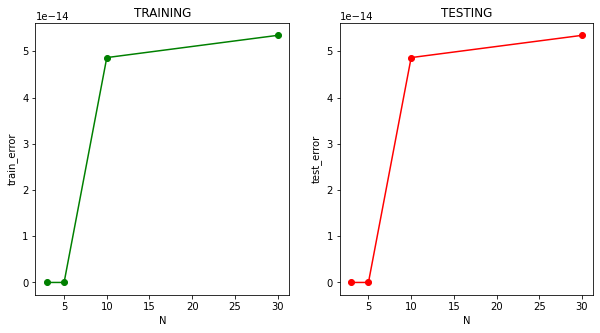

In [ ]:
N = [3,5,10,30]
D = 5
train_mse_list = []
test_mse_list = []
for i in N:
  _, _, _, w, train_mse = trainModel(i, D)
  _, _, _, test_mse = testModel(i, w)
  # print(f"N: {i}, train_mse: {train_mse}, test_mse: {test_mse}")
  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(N[:],train_mse_list[:], 'g-o')
plt.title("TRAINING")
plt.ylabel('train_error')
plt.xlabel('N')
plt.subplot(122)
plt.plot(N[:],test_mse_list[:], 'r-o')
plt.title("TESTING")
plt.ylabel('test_error')
plt.xlabel('N')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

D: 0, train_mse: 0.07428732082291341, test_mse: 0.07428732082291341
D: 1, train_mse: 0.0004553420583144082, test_mse: 0.0004553420583144082
D: 2, train_mse: 1.2058044219358266e-05, test_mse: 1.2058044219358266e-05
D: 4, train_mse: 1.1727996992205904e-10, test_mse: 1.1727996992205904e-10
D: 7, train_mse: 1.6529916570775123e-14, test_mse: 1.6529916570775123e-14
D: 12, train_mse: 4.1529913485065276e-11, test_mse: 4.1529913485065276e-11


Text(0.5, 0, 'D')

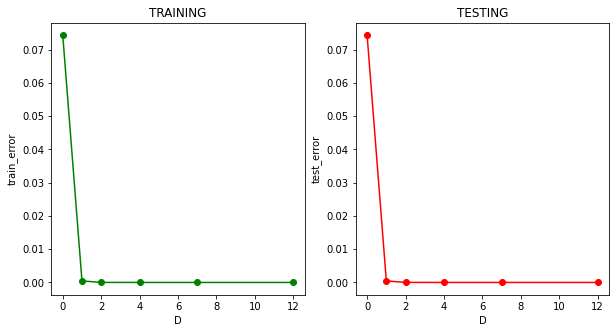

In [ ]:
N = 10
D = [0,1,2,4,7,12]
train_mse_list = []
test_mse_list = []
for i in D:
  _, _, _, w, train_mse = trainModel(N, i)
  _, _, _, test_mse = testModel(N, w)
  # print(f"D: {i}, train_mse: {train_mse}, test_mse: {test_mse}")
  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(D[:],train_mse_list[:], 'g-o')
plt.title("TRAINING")
plt.ylabel('train_error')
plt.xlabel('D')
plt.subplot(122)
plt.plot(D[:],test_mse_list[:], 'r-o')
plt.title("TESTING")
plt.ylabel('test_error')
plt.xlabel('D')